In [195]:
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import sys, os
import numpy as np
import glob
import pandas as pd

#Gathering all data in dataframe

seeds = np.linspace(1,10,10,dtype = 'int')
eas = ['uni','gaus']
enemies = [2,5,6]
indp_gains = {}
j=0
for enemy in enemies:
    for ea in eas:
        means=[]
        for seed in seeds:
            folder = 'EA' + ea + '/enemy%i'%enemy
            test = pickle.load(open(folder+ '/exp%i'%seed + '_gains.p',"rb"))

            df = pd.DataFrame(test)
            mean_gain = df['gain'].mean(axis=0)
            means.append(mean_gain)
            
        indp_gains['EA' + ea + '_enemy%i'%enemy] = means

In [121]:
data=pd.DataFrame(indp_gains)

#filtering for each individual boxplot
columns=[]
for en in enemies:
    columns.append("Enemy %i"%en)   
print(columns)

filter_uni = [col for col in data if col.startswith('EAuni')]
data_uni = data[filter_uni]
data_uni.columns = columns

filter_gaus = [col for col in data if col.startswith('EAgaus')]
data_gaus = data[filter_gaus]
data_gaus.columns = columns


columns = ['Uniform', 'Gaussian']
filter_en2 = [col for col in data if col.endswith('2')]
data_en2 = data[filter_en2]
data_en2.columns = columns


filter_en5 = [col for col in data if col.endswith('5')]
data_en5 = data[filter_en5]
data_en5.columns = columns

filter_en6 = [col for col in data if col.endswith('6')]
data_en6 = data[filter_en6]
data_en6.columns = columns

['Enemy 2', 'Enemy 5', 'Enemy 6']


Text(0.5, 1.0, 'All data')

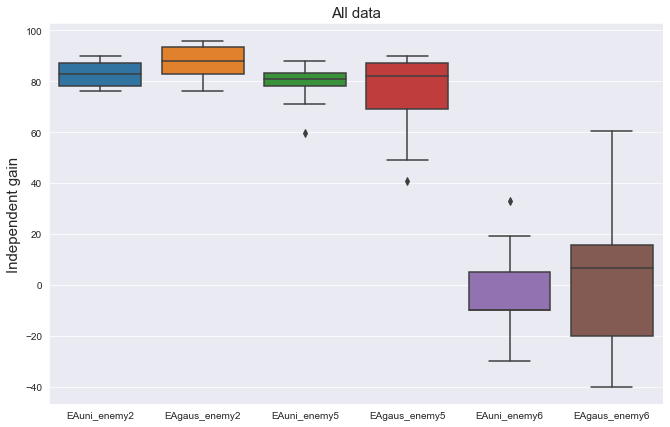

In [145]:
plt.figure(figsize=(11,7))
sns.set_style("darkgrid")


ax=sns.boxplot(x="variable", y="value",data=pd.melt(data))
ax.set_ylabel('Independent gain',fontsize=15)
ax.set_xlabel('')
ax.set_title('All data',fontsize=15)

Text(0.5, 1.0, 'Enemy 2')

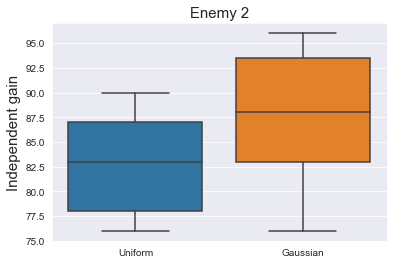

In [146]:
axes = sns.boxplot(x="variable", y="value",data=pd.melt(data_en2))
axes.set_xlabel('')
axes.set_ylabel('Independent gain',fontsize=15)
axes.set_title('Enemy 2',fontsize=15)

Text(0.5, 1.0, 'Enemy 5')

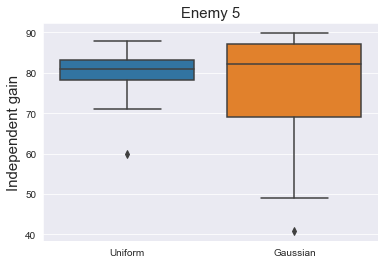

In [147]:
axes = sns.boxplot(x="variable", y="value",data=pd.melt(data_en5))
axes.set_xlabel('')
axes.set_ylabel('Independent gain',fontsize=15)
axes.set_title('Enemy 5',fontsize=15)

Text(0.5, 1.0, 'Enemy 6')

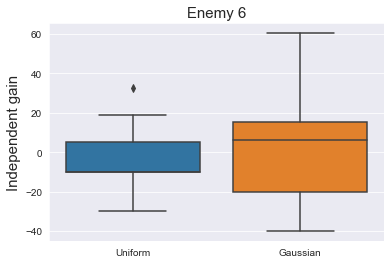

In [148]:
axes = sns.boxplot(x="variable", y="value",data=pd.melt(data_en6))
axes.set_xlabel('')
axes.set_ylabel('Independent gain',fontsize=15)
axes.set_title('Enemy 6',fontsize=15)

Text(0.5, 1.0, 'Uniform mutation')

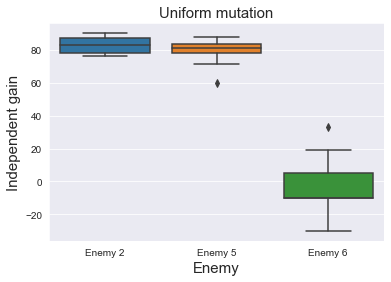

In [149]:
axes = sns.boxplot(x="variable", y="value",data=pd.melt(data_uni))
axes.set_xlabel('Enemy',fontsize=15)
axes.set_ylabel('Independent gain',fontsize=15)
axes.set_title('Uniform mutation',fontsize=15)

Text(0.5, 1.0, 'Gaussian mutation')

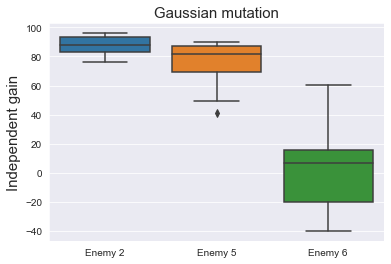

In [150]:
axes = sns.boxplot(x="variable", y="value",data=pd.melt(data_gaus))
axes.set_xlabel('')
axes.set_ylabel('Independent gain',fontsize=15)
axes.set_title('Gaussian mutation',fontsize=15)

## Plotting lineplots

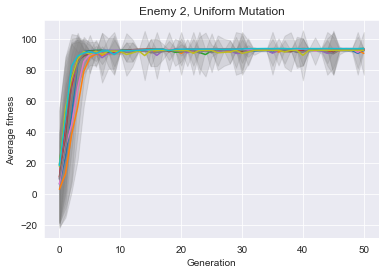

In [154]:
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import sys, os
import numpy as np
import glob

#ACCESS CORRECT FOLDER
ea = 'uni' #ENTER WHICH EA YOU ARE RUNNING ('gaus' or 'uni')
enemy = 2 #ENTER ENEMY

folder = 'EA' + ea + '/enemy%i'%enemy
for n,i in enumerate(glob.glob(folder+'/*[!_gains].p')):
    test = pickle.load(open(i,"rb"))
    gen = np.linspace(0,len(test['avg'])-1,len(test['avg']))
    
    # Plotting stuff
    plt.plot(gen,test['avg'])#,label='exp%i'%(n+1))
    plt.fill_between(gen, test['avg'] - test['std'], test['avg'] + test['std'],color='gray', alpha=0.2)
    
plt.xlabel('Generation')
plt.ylabel('Average fitness')

if ea =='gaus':
    eatitle='Gaussian'
else:
    eatitle='Uniform'
plt.title('Enemy %i, %s Mutation'%(enemy, eatitle))
plt.show()

In [179]:
seeds = np.linspace(1,10,10,dtype = 'int')
eas = ['uni','gaus']
enemies = [2,5,6]

lineplots = {}
for enemy in enemies:
    for ea in eas:
        maxims = []
        avgs = []
        folder = 'EA' + ea + '/enemy%i'%enemy
        for n,i in enumerate(glob.glob(folder+'/*[!_gains].p')):
            test = pickle.load(open(i,"rb"))
            
            avgs.append(test['avg'])
            maxims.append(test['max'])
            
        lineplots['EA' + ea + '_max_enemy%i'%enemy] = np.mean(maxims,axis=0)
        lineplots['EA' + ea + '_maxstd_enemy%i'%enemy] = np.std(maxims,axis=0)
        lineplots['EA' + ea + '_avg_enemy%i'%enemy] = np.mean(avgs,axis=0)
        lineplots['EA' + ea + '_avgstd_enemy%i'%enemy] = np.std(avgs,axis=0)
        
gen = np.linspace(0,len(test['avg'])-1,len(test['avg']))

lineplots['gen'] = gen

In [180]:
linedata = pd.DataFrame(lineplots)

linedata.head()

,EAuni_max_enemy2,EAuni_maxstd_enemy2,EAuni_avg_enemy2,EAuni_avgstd_enemy2,EAgaus_max_enemy2,EAgaus_maxstd_enemy2,EAgaus_avg_enemy2,EAgaus_avgstd_enemy2,EAuni_max_enemy5,EAuni_maxstd_enemy5,...,EAgaus_avgstd_enemy5,EAuni_max_enemy6,EAuni_maxstd_enemy6,EAuni_avg_enemy6,EAuni_avgstd_enemy6,EAgaus_max_enemy6,EAgaus_maxstd_enemy6,EAgaus_avg_enemy6,EAgaus_avgstd_enemy6,gen
0,91.512312,1.292931,11.067358,5.223068,91.512312,1.292931,11.067358,5.223068,91.882835,0.956195,...,4.812343,32.210655,10.541683,-2.195193,1.201495,32.210655,10.541683,-2.195193,1.201495,0.0
1,91.313540,1.301956,37.058107,12.729190,91.389002,1.347439,38.259238,8.103839,92.150385,0.994646,...,12.332590,34.796857,12.846114,4.490063,3.319082,34.939867,10.648390,4.618426,2.545932,1.0
2,91.616251,0.757375,63.911876,14.163260,91.848951,0.984440,71.226165,8.788627,92.588498,0.728150,...,13.106544,38.485630,9.332726,11.386349,3.970018,36.723316,9.736281,13.128996,2.767180,2.0
3,91.870860,0.611080,81.138552,9.972191,91.848951,0.984440,87.550788,2.964875,92.794518,0.680674,...,3.377746,41.221686,8.722197,18.523337,4.724462,36.723316,9.736281,21.384424,5.021647,3.0
4,91.955567,0.648648,88.909418,3.739896,92.402572,0.443995,90.792785,1.523918,92.983590,0.600480,...,1.001131,44.779755,10.690500,24.781237,5.766939,36.726358,9.737125,28.813887,8.454250,4.0


In [185]:
data = linedata
# #filtering
# columns=[]
# for en in enemies:
#     columns.append("Enemy %i"%en)   
# print(columns)

filter_uni = [col for col in data if col.startswith('EAuni') or col=='gen']
data_uni = data[filter_uni]
#data_uni.columns = columns

filter_gaus = [col for col in data if col.startswith('EAgaus')or col=='gen']
data_gaus = data[filter_gaus]
#data_gaus.columns = columns

columns = ['Uniform', 'Gaussian']
filter_en2 = [col for col in data if col.endswith('2')or col=='gen']
data_en2 = linedata[filter_en2]
#data_en2.columns = columns


filter_en5 = [col for col in data if col.endswith('5')or col=='gen']
data_en5 = linedata[filter_en5]
#data_en5.columns = columns

filter_en6 = [col for col in data if col.endswith('6')or col=='gen']
data_en6 = linedata[filter_en6]
#data_en6.columns = columns

## Plots per enemy

Text(0, 0.5, 'Fitness')

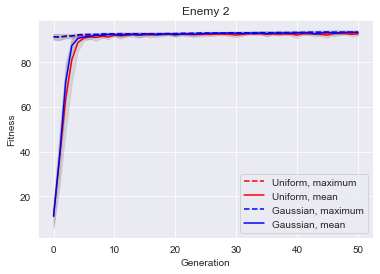

In [213]:
#enemy 2 plot
eas = ['uni','gaus']


fig,ax = plt.subplots(1,1)
enemy = 2
data = data_en2
for ea in eas:
    if ea =='gaus':
        eatitle='Gaussian'
        color= 'blue'
    else:
        eatitle='Uniform'
        color='red'
    
    maxd = 'EA' + ea + '_max_enemy%i'%enemy
    maxstd = 'EA' + ea + '_maxstd_enemy%i'%enemy
    
    avgd = 'EA' + ea + '_avg_enemy%i'%enemy
    avgstd = 'EA' + ea + '_avgstd_enemy%i'%enemy
    
    plt.plot(data['gen'],data[maxd],label='%s, maximum'%eatitle,color=color,linestyle='--')
    upper = data[maxd] + data[maxstd]
    lower = data[maxd] - data[maxstd]
    plt.fill_between(data['gen'], lower, upper,color='gray', alpha=0.2)
    
    plt.plot(data['gen'],data[avgd],label='%s, mean'%eatitle,color=color)
    upper = data[avgd] + data[avgstd]
    lower = data[avgd] - data[avgstd]
    plt.fill_between(data['gen'], lower, upper,color='gray', alpha=0.2)
    
plt.legend(loc='lower right')
plt.title('Enemy %i'%enemy)
plt.xlabel('Generation')
plt.ylabel('Fitness')
#plt.ylim(80,100)

Text(0, 0.5, 'Fitness')

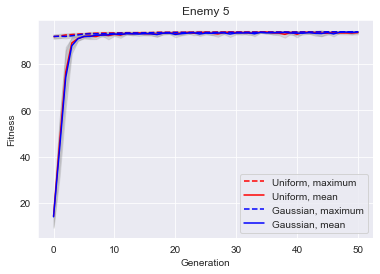

In [216]:
#enemy 5 plot
eas = ['uni','gaus']


fig,ax = plt.subplots(1,1)
enemy = 5
data = data_en5

for ea in eas:
    if ea =='gaus':
        eatitle='Gaussian'
        color= 'blue'
    else:
        eatitle='Uniform'
        color='red'
    
    maxd = 'EA' + ea + '_max_enemy%i'%enemy
    maxstd = 'EA' + ea + '_maxstd_enemy%i'%enemy
    
    avgd = 'EA' + ea + '_avg_enemy%i'%enemy
    avgstd = 'EA' + ea + '_avgstd_enemy%i'%enemy
    
    plt.plot(data['gen'],data[maxd],label='%s, maximum'%eatitle,color=color,linestyle='--')
    upper = data[maxd] + data[maxstd]
    lower = data[maxd] - data[maxstd]
    plt.fill_between(data['gen'], lower, upper,color='gray', alpha=0.2)
    
    plt.plot(data['gen'],data[avgd],label='%s, mean'%eatitle,color=color)
    upper = data[avgd] + data[avgstd]
    lower = data[avgd] - data[avgstd]
    plt.fill_between(data['gen'], lower, upper,color='gray', alpha=0.2)
    
plt.legend(loc='lower right')
plt.title('Enemy %i'%enemy)
plt.xlabel('Generation')
plt.ylabel('Fitness')
#plt.ylim(80,100)

Text(0, 0.5, 'Fitness')

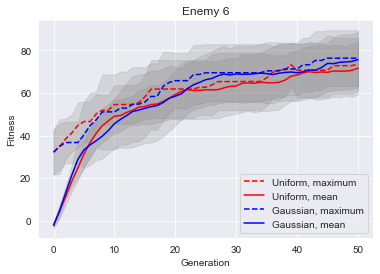

In [217]:
#enemy 6 plot
eas = ['uni','gaus']


fig,ax = plt.subplots(1,1)
enemy = 6
data = data_en6
for ea in eas:
    if ea =='gaus':
        eatitle='Gaussian'
        color= 'blue'
    else:
        eatitle='Uniform'
        color='red'
    
    maxd = 'EA' + ea + '_max_enemy%i'%enemy
    maxstd = 'EA' + ea + '_maxstd_enemy%i'%enemy
    
    avgd = 'EA' + ea + '_avg_enemy%i'%enemy
    avgstd = 'EA' + ea + '_avgstd_enemy%i'%enemy
    
    plt.plot(data['gen'],data[maxd],label='%s, maximum'%eatitle,color=color,linestyle='--')
    upper = data[maxd] + data[maxstd]
    lower = data[maxd] - data[maxstd]
    plt.fill_between(data['gen'], lower, upper,color='gray', alpha=0.2)
    
    plt.plot(data['gen'],data[avgd],label='%s, mean'%eatitle,color=color)
    upper = data[avgd] + data[avgstd]
    lower = data[avgd] - data[avgstd]
    plt.fill_between(data['gen'], lower, upper,color='gray', alpha=0.2)
    
plt.legend(loc='lower right')
plt.title('Enemy %i'%enemy)
plt.xlabel('Generation')
plt.ylabel('Fitness')
#plt.ylim(80,100)